In [52]:
import pandas as pd

In [53]:
data=pd.read_csv('historical_data.csv')

In [54]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [55]:
data.shape

(197428, 16)

In [56]:
data.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [57]:
## mapping store id with most common category and imputing nan
mapped = data.groupby('store_id')['store_primary_category'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [58]:
data['store_primary_category'] = data['store_primary_category'].fillna(data['store_id'].map(mapped))

In [59]:
data['store_primary_category'].isna().sum()

867

In [60]:
#imputing remaining with mode
data['store_primary_category']=data['store_primary_category'].fillna(data['store_primary_category'].mode()[0])

In [61]:
data['store_primary_category'].isna().sum()

0

In [62]:
data['order_protocol']=data['order_protocol'].fillna(data['order_protocol'].mode()[0])

In [63]:
#imputing total_onshift_dashers
data['total_onshift_dashers'].describe()

count    181166.000000
mean         44.808093
std          34.526783
min          -4.000000
25%          17.000000
50%          37.000000
75%          65.000000
max         171.000000
Name: total_onshift_dashers, dtype: float64

In [64]:
data['total_onshift_dashers'].nsmallest()

179225   -4.0
60282    -3.0
6034     -2.0
12888    -2.0
61131    -2.0
Name: total_onshift_dashers, dtype: float64

In [65]:
data['total_busy_dashers'].nsmallest()

120296   -5.0
59764    -4.0
67149    -4.0
59370    -3.0
126816   -3.0
Name: total_busy_dashers, dtype: float64

In [66]:
data['total_outstanding_orders'].nsmallest()

36317   -6.0
56554   -6.0
72838   -6.0
85718   -6.0
94795   -6.0
Name: total_outstanding_orders, dtype: float64

In [67]:
columns = ['total_outstanding_orders', 'total_busy_dashers', 'total_onshift_dashers']
for c in columns:
    data = data[data[c] > 0]  # Keep only rows where the value is >= 0



In [68]:
data.isna().sum()

market_id                                       893
created_at                                        0
actual_delivery_time                              7
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_dashers                             0
total_busy_dashers                                0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    465
dtype: int64

In [69]:
data['estimated_store_to_consumer_driving_duration'].describe()

count    176169.000000
mean        546.197118
std         218.416137
min           0.000000
25%         384.000000
50%         545.000000
75%         703.000000
max        2088.000000
Name: estimated_store_to_consumer_driving_duration, dtype: float64

In [70]:
data['estimated_store_to_consumer_driving_duration']=data['estimated_store_to_consumer_driving_duration'].fillna(data['estimated_store_to_consumer_driving_duration'].median())

In [71]:
data['market_id'].describe()

count    175741.000000
mean          2.769365
std           1.330059
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max           6.000000
Name: market_id, dtype: float64

In [72]:
data['market_id']=data['market_id'].fillna(data['market_id'].median())

In [73]:
data.dropna(inplace=True)

In [74]:
data.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

## feature engineering

In [75]:
# Convert 'created_at' to datetime if it's not already
data['created_at'] = pd.to_datetime(data['created_at'])

# Calculate 'day_type': working or weekend
data['day_type'] = data['created_at'].dt.dayofweek
data['day_type'] = data['day_type'].apply(lambda x: 'weekend' if x >= 5 else 'working')

# Calculate 'time_of_day': morning, afternoon, evening, night
data['time_of_day'] = data['created_at'].dt.hour
data['time_of_day'] = data['time_of_day'].apply(
    lambda x: 'morning' if 6 <= x < 12 else
              'afternoon' if 12 <= x < 18 else
              'evening' if 18 <= x < 22 else 'night'
)

# Check the result
print(data[['created_at', 'day_type', 'time_of_day']])


                created_at day_type time_of_day
0      2015-02-06 22:24:17  working       night
1      2015-02-10 21:49:25  working     evening
3      2015-02-03 21:21:45  working     evening
4      2015-02-15 02:40:36  weekend       night
5      2015-01-28 20:30:38  working     evening
...                    ...      ...         ...
197423 2015-02-17 00:19:41  working       night
197424 2015-02-13 00:01:59  working       night
197425 2015-01-24 04:46:08  weekend       night
197426 2015-02-01 18:18:15  weekend     evening
197427 2015-02-08 19:24:33  weekend     evening

[176627 rows x 3 columns]


In [76]:
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])
data['delivery_duration']=(data['actual_delivery_time'])-(data['created_at'])

In [77]:
#also converting seconds into minutes
data['delivery_duration'] = data['delivery_duration'].dt.total_seconds() / 60

In [78]:
data.duplicated().sum() #no duplicates

0

In [79]:
data.drop(data[data['subtotal'] == 0].index, inplace=True)

In [80]:
data=data[data['min_item_price']>0]

In [81]:
#avg price per item
data['avg_price_per_item']=(data['total_items'])/(data['subtotal'])

In [82]:
#unique items
data['item_variety_ratio']=(data['num_distinct_items'])/(data['total_items'])

In [83]:
#price range
data['price_range']=(data['max_item_price'])=(data['min_item_price'])

In [84]:
data['busy_driver_ratio']=(data['total_busy_dashers'])/(data['total_onshift_dashers'])

In [85]:
# converting into minutes
data['estimated_order_place_duration']=data['estimated_order_place_duration']/60

In [86]:
data['estimated_store_to_consumer_driving_duration']=data['estimated_store_to_consumer_driving_duration']/60

In [87]:
data['delivery_duration'].describe()

count    174303.000000
mean         47.597962
std          23.308781
min           1.683333
25%          35.050000
50%          44.266667
75%          56.216667
max        5541.366667
Name: delivery_duration, dtype: float64

In [88]:
data['delivery_duration'].describe()

count    174303.000000
mean         47.597962
std          23.308781
min           1.683333
25%          35.050000
50%          44.266667
75%          56.216667
max        5541.366667
Name: delivery_duration, dtype: float64

## encoding

In [89]:
#encoding categorical columns
columns=['store_primary_category','day_type','time_of_day']
for col in columns:
    cat=pd.get_dummies(data[col],dtype='int')
    data=pd.concat([data,cat],axis=1)    


In [90]:
data.drop(columns=['store_primary_category','order_protocol','day_type','time_of_day','market_id','created_at','actual_delivery_time','store_id','min_item_price','max_item_price','num_distinct_items'], inplace=True, axis=1)

In [91]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import linear_model

In [92]:
def make_regression(x_train, y_train, x_test, y_test, model, model_name, verbose=True):
    model.fit(x_train, y_train)
    y_predict_train = model.predict(x_train)  # Predictions for training set
    train_error = mean_squared_error(y_train, y_predict_train)  # Calculate train error
    y_predict_test = model.predict(x_test)  # Predictions for test set
    test_error = mean_squared_error(y_test, y_predict_test)  # Calculate test error
    if verbose:
        print(f"Train error = {train_error} in {model_name}")
        print(f"Test error = {test_error} in {model_name}")
    trained_model = model

    return trained_model, y_predict_test, train_error, test_error

        

In [94]:
# Your initial dictionaries
pred_dict = {
    'regression_model': [],
    'feature_set': [],
    'RMSE': [],
}

regression_models = {
    'DecisionTree': tree.DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=6, max_features='sqrt', n_jobs=-1, random_state=42),
    'LGBM': LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1, random_state=42),
    'MLP': MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Ensure selected_features_40 uses only columns present in the data
feature_sets = {
    'full data': data.columns.to_list(),
}

# Loop through regression models
for feature_set_name, feature_set in feature_sets.items():
    for model_name, model in regression_models.items():
        x = data[feature_set]  # Get features from the cleaned feature set
        y = data['delivery_duration']
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        # Train the model and calculate errors
        trained_model, y_predict, train_error, test_error = make_regression(
            x_train, y_train, x_test, y_test,
            model, model_name, verbose=False
        )

        # Use test_error as RMSE
        rmse_error = test_error

        # Save results
        pred_dict['regression_model'].append(model_name)
        pred_dict['feature_set'].append(feature_set_name)
        pred_dict['RMSE'].append(rmse_error)

# Convert pred_dict to a DataFrame for easier analysis
pred_df = pd.DataFrame(pred_dict)
print(pred_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2409
[LightGBM] [Info] Number of data points in the train set: 139442, number of used features: 82
[LightGBM] [Info] Start training from score 47.607140
  regression_model feature_set        RMSE
0     DecisionTree   full data  260.767784
1     RandomForest   full data  212.920638
2             LGBM   full data   84.323108
3              MLP   full data    0.177851


## top correlations

In [95]:
def top_corr(df,n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=high_corr(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [96]:
print('top absolute correlations')
print(top_corr(data,20))

top absolute correlations
weekend                   working                     1.000000
total_onshift_dashers     total_busy_dashers          0.941239
                          total_outstanding_orders    0.934077
total_busy_dashers        total_outstanding_orders    0.930788
evening                   night                       0.911099
total_items               subtotal                    0.685729
avg_price_per_item        price_range                 0.545667
total_items               item_variety_ratio          0.441320
                          price_range                 0.425614
                          avg_price_per_item          0.341479
avg_price_per_item        fast                        0.315008
total_onshift_dashers     night                       0.297331
avg_price_per_item        item_variety_ratio          0.292235
afternoon                 night                       0.281701
total_outstanding_orders  night                       0.279930
total_busy_dashers        nig

# feature importance

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [98]:
x=data.drop(columns=['delivery_duration'])
x.columns = x.columns.astype(str)
y=data['delivery_duration']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
feature_names=[f" feature {i}" for i in range ((x.shape[1]))]
forest=RandomForestRegressor(random_state=42)
forest.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

<IPython.core.display.Javascript object>

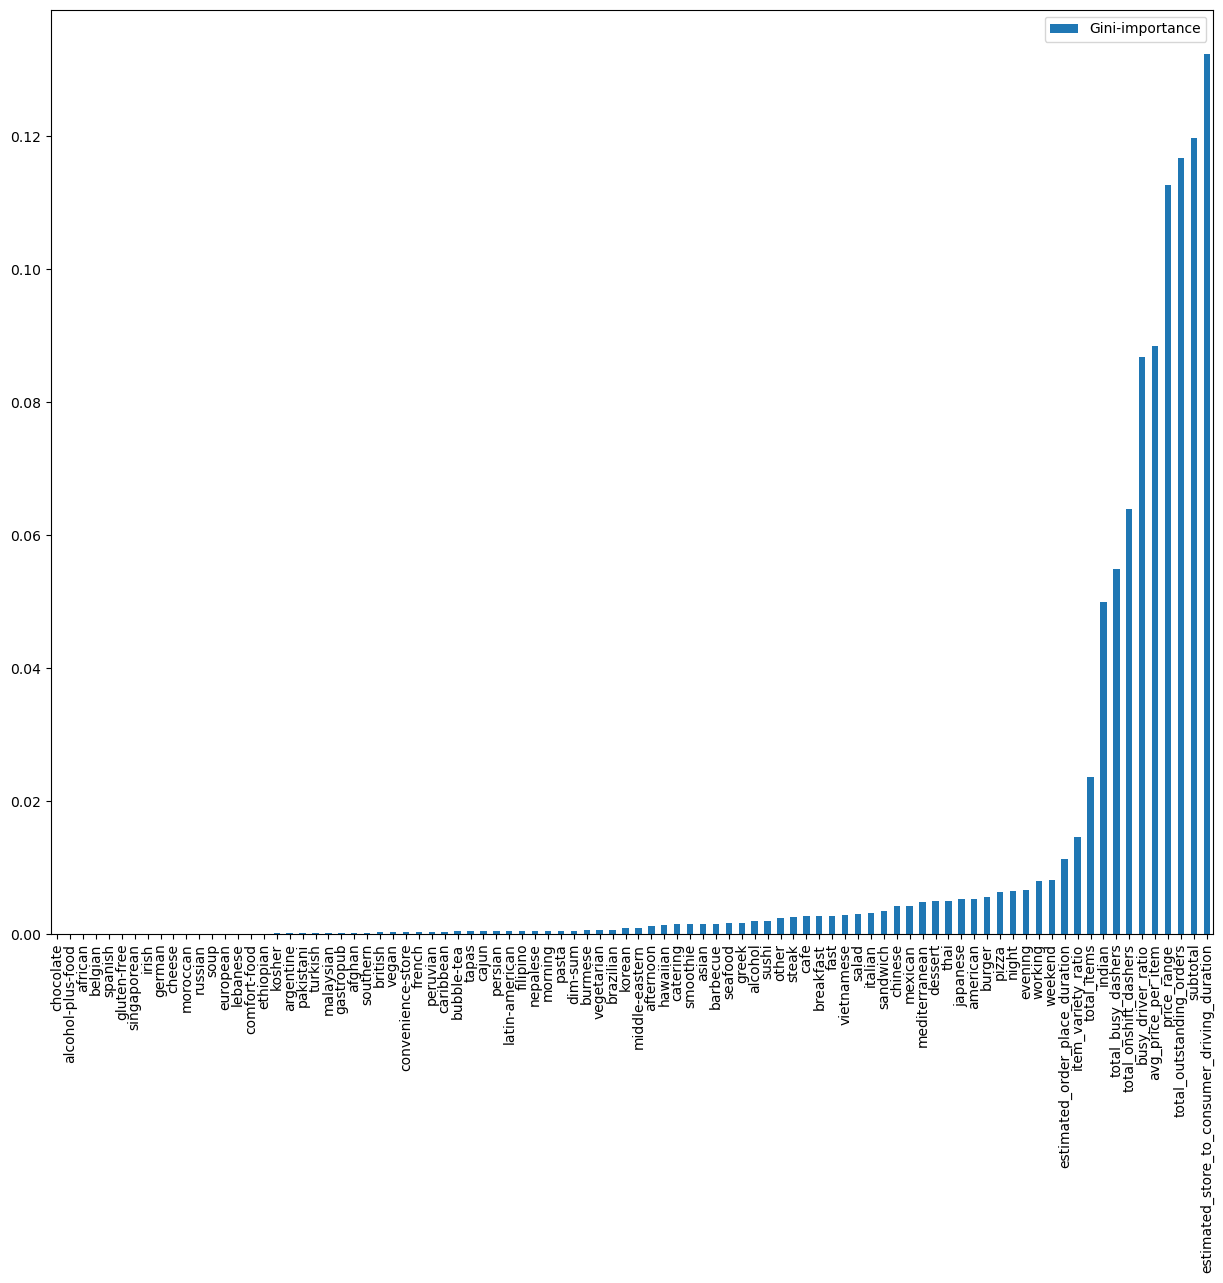

In [100]:
feat={}
for feature, importance in zip(x.columns, forest.feature_importances_):
    feat[feature]=importance
importances=pd.DataFrame.from_dict(feat, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

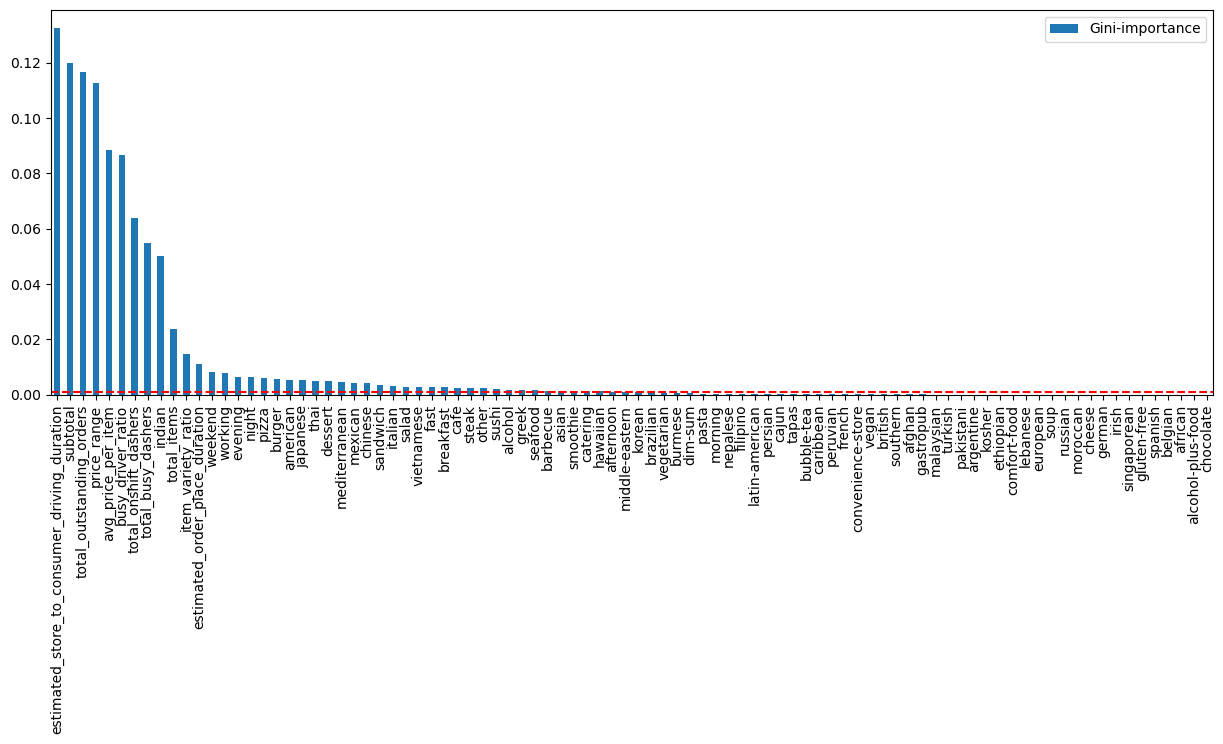

In [101]:
importances.sort_values(by='Gini-importance', ascending=False).plot(kind='bar', figsize=(15,5))
plt.axhline(y=0.001, color='red', linestyle='--')  # visualize threshold
plt.show()


In [102]:
data.shape

(174303, 91)

In [103]:
low_imp_features = importances[importances['Gini-importance'] < 0.001].index.tolist()

# Drop them from your data
data1 = data.drop(columns=low_imp_features)

In [104]:
data1=data1.drop(columns=['working','total_busy_dashers','total_onshift_dashers','evening'])

In [105]:
data1.shape

(174303, 41)

In [106]:
y_train.describe() 

count    139442.000000
mean         47.607140
std          24.255152
min           1.683333
25%          35.033333
50%          44.283333
75%          56.216667
max        5541.366667
Name: delivery_duration, dtype: float64

## neural network

In [107]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(42)

In [108]:
#neural network
def create_model(feature_set_size):
    model=Sequential()
    model.add(Dense(64,input_dim=feature_set_size,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model 

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [110]:
x=data1.drop(columns=['delivery_duration'])
y=data1['delivery_duration']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [112]:
feature_set_size=x_train_scaled.shape[1]
model=create_model(feature_set_size)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
# Step 1: Log transform the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Step 2: Fit the model on log-transformed targets
history = model.fit(x_train_scaled, y_train_log, epochs=100, batch_size=32, verbose=True)

# Step 3: Evaluate on log-transformed targets
loss, rmse = model.evaluate(x_test_scaled, y_test_log)
print(f"Test Loss: {loss}")
print(f"Test RMSE: {rmse}")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.3508 - root_mean_squared_error: 0.5367
Epoch 2/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1054 - root_mean_squared_error: 0.3246
Epoch 3/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1028 - root_mean_squared_error: 0.3206
Epoch 4/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1010 - root_mean_squared_error: 0.3179
Epoch 5/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0995 - root_mean_squared_error: 0.3154
Epoch 6/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0984 - root_mean_squared_error: 0.3137
Epoch 7/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0979 - root_mean_squared_error: 0.3128
Epoch 8/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0973 - root_mean_squared_error: 0.3119
Epoch 9/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0969 - root_mean_squared_error: 0.3112
Epoch 10/100
4358/4358 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 

In [114]:
# Step 4: Predict using the trained model
y_pred_log = model.predict(x_test_scaled)

# Step 5: Inverse transform the predictions back to the original scale
y_pred = np.expm1(y_pred_log)  # Inverse of log transformation

# Step 6: Calculate RMSE on the original scale
rmse_original_scale = np.sqrt(mean_squared_error(y_test, y_pred))   
print(f"Test RMSE on original scale: {rmse_original_scale}")

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test RMSE on original scale: 17.383077803608042
